<a href="https://colab.research.google.com/github/su92-msaiw-f25-006-boop/lessons-learned/blob/Email_Classification_NN/Email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import important libraries**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

**DataSet Ready**

In [2]:
data = {
    'text': [
        "Free money offer", "Hi, how are you?", "Win cash prizes",
        "Meeting tomorrow", "Cheap loans available", "Let's have lunch",
        "Congratulations, you won!", "Project deadline extended",
        "Claim your free gift", "See you soon"
    ],
    'label': ["spam","ham","spam","ham","spam","ham","spam","ham","spam","ham"]
}

**Convert to DataFrame**

In [3]:
df = pd.DataFrame(data)

**Raw Data Visualization**

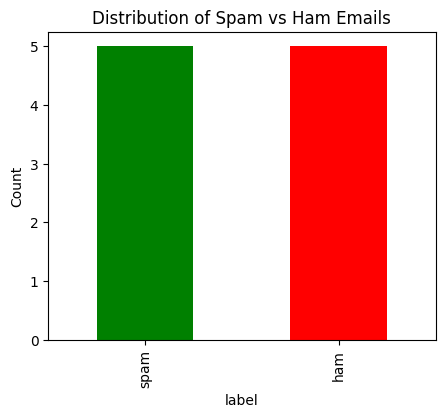

In [4]:
plt.figure(figsize=(5,4))
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Distribution of Spam vs Ham Emails")
plt.ylabel("Count")
plt.show()

**Text Preprocessing**

In [5]:
vectorizer = CountVectorizer()
X_features = vectorizer.fit_transform(df['text']).toarray()

**Label Encoding**

In [6]:
encoder = LabelEncoder()
y_labels = encoder.fit_transform(df['label'])

**Convert to PyTorch Tensors**




In [25]:
X_tensor = torch.tensor(X_features, dtype=torch.float32)
y_tensor = torch.tensor(y_labels, dtype=torch.long)

**Split into Training and Test Data**

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0], "Test samples:", X_test.shape[0])

Training samples: 8 Test samples: 2


**Neural Network Class**

In [27]:
class SpamClassifierNN(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(16, 2)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

**Initialize Model**




In [28]:
model = SpamClassifierNN(X_train.shape[1])
torch._dynamo.disable()

**Define Loss**

In [29]:
criterion = nn.CrossEntropyLoss()

**Optimizer**

In [30]:
optimizer = optim.Adam(model.parameters(), lr=0.01)

**Training Loop**

In [31]:
epochs = 200

In [32]:
train_losses = []

In [33]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    if (epoch+1) % 20 == 0:
        _, predicted = torch.max(outputs, 1)
        acc = (predicted == y_train).sum().item() / y_train.size(0) * 100
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}, Training Accuracy: {acc:.2f}%")

Epoch 20/200, Loss: 0.1825, Training Accuracy: 100.00%
Epoch 40/200, Loss: 0.0121, Training Accuracy: 100.00%
Epoch 60/200, Loss: 0.0024, Training Accuracy: 100.00%
Epoch 80/200, Loss: 0.0013, Training Accuracy: 100.00%
Epoch 100/200, Loss: 0.0009, Training Accuracy: 100.00%
Epoch 120/200, Loss: 0.0006, Training Accuracy: 100.00%
Epoch 140/200, Loss: 0.0004, Training Accuracy: 100.00%
Epoch 160/200, Loss: 0.0003, Training Accuracy: 100.00%
Epoch 180/200, Loss: 0.0003, Training Accuracy: 100.00%
Epoch 200/200, Loss: 0.0002, Training Accuracy: 100.00%


**Visualize Training Loss**

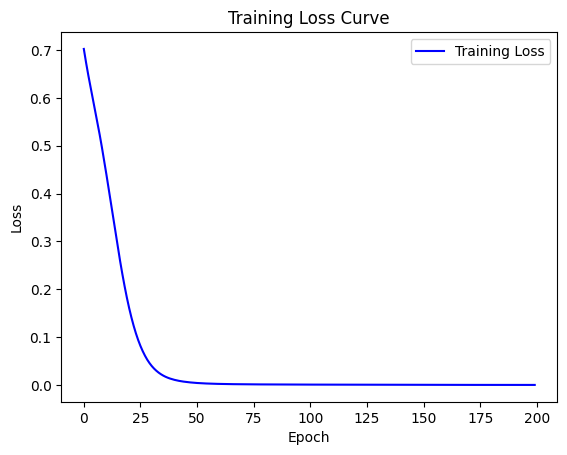

In [34]:
plt.plot(train_losses, color='blue', label='Training Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

**Evaluate on Training Data**

In [35]:
with torch.no_grad():
    outputs_train = model(X_train)
    _, predicted_train = torch.max(outputs_train, 1)

train_acc = (predicted_train == y_train).sum().item() / y_train.size(0) * 100
print(f"\nFinal Training Accuracy: {train_acc:.2f}%")


Final Training Accuracy: 100.00%


**Visualize Training Predictions**

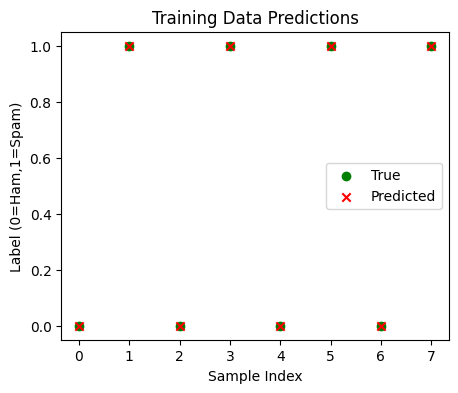

In [36]:
plt.figure(figsize=(5,4))
plt.scatter(range(len(y_train)), y_train.numpy(), label='True', color='green')
plt.scatter(range(len(predicted_train)), predicted_train.numpy(), label='Predicted', color='red', marker='x')
plt.title("Training Data Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Label (0=Ham,1=Spam)")
plt.legend()
plt.show()

**Evaluate on Test Data**

In [37]:
with torch.no_grad():
    outputs_test = model(X_test)
    _, predicted_test = torch.max(outputs_test, 1)

test_acc = (predicted_test == y_test).sum().item() / y_test.size(0) * 100
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 100.00%


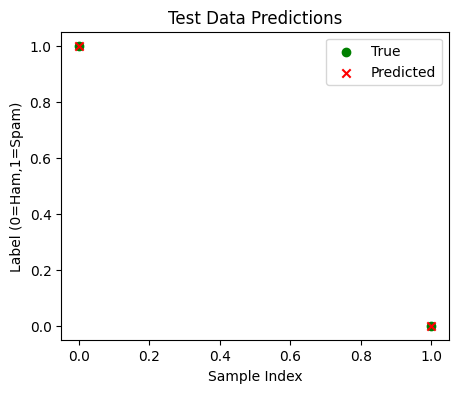

In [38]:
#Visualize Test Predictions
plt.figure(figsize=(5,4))
plt.scatter(range(len(y_test)), y_test.numpy(), label='True', color='green')
plt.scatter(range(len(predicted_test)), predicted_test.numpy(), label='Predicted', color='red', marker='x')
plt.title("Test Data Predictions")
plt.xlabel("Sample Index")
plt.ylabel("Label (0=Ham,1=Spam)")
plt.legend()
plt.show()

In [39]:
#Predict on New Emails
new_emails = [
    "Win free tickets", "Hello friend, how are you?", "Lowest prices available"
]
new_features = vectorizer.transform(new_emails).toarray()
new_tensor = torch.tensor(new_features, dtype=torch.float32)

with torch.no_grad():
    outputs_new = model(new_tensor)
    _, predicted_new = torch.max(outputs_new, 1)

print("\nPredictions on New Emails:")
for email, pred in zip(new_emails, predicted_new):
    label = "Ham" if pred==0 else "Spam"
    print(f"'{email}' -> {label}")


Predictions on New Emails:
'Win free tickets' -> Spam
'Hello friend, how are you?' -> Ham
'Lowest prices available' -> Spam
